### 查看系统版本

In [2]:
import sys
print(sys.version)
print(sys.executable)

3.8.3 (default, Jul  2 2020, 17:30:36) [MSC v.1916 64 bit (AMD64)]
C:\ProgramData\Anaconda3\python.exe


### 导入依赖包

In [4]:
from pandas import read_csv
from   import pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest,f_regression
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.naive_bayes import BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Perceptron
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
import re

### 方法定义

In [5]:
'''
定义条形统计图和扇形统计图展示target分布
@data_cr: csv读取格式
@target: 统计的target
'''
def showData(data_cr, target):
    # 目标变量分布可视化
    fig, axs = plt.subplots(1,2,figsize=(14,7)) # 创建条形统计图和扇形统计图
    sns.countplot(x=target, data=data_cr, ax=axs[0]) # 条形统计Type的量
    data_cr[target].value_counts().plot(x=None,y=None, kind='pie', ax=axs[1],autopct='%1.2f%%') # 扇形统计Type的量
    axs[1].set_title("Percentage of each Class")
    plt.show()
    data_cr.groupby(target).size() # Type分布情况

    
'''
定义特征影响权重的计算方法
@data_cr: csv读取格式
'''
def imporFeature(data_cr):
    names = data_cr[x_feature].columns
    clf=RandomForestClassifier(n_estimators=10,random_state=123)#构建分类随机森林分类器
    clf.fit(X, y) #对自变量和因变量进行拟合
    names, clf.feature_importances_
    for feature in zip(names, clf.feature_importances_):
        print(feature)


    plt.style.use('fivethirtyeight')
    plt.rcParams['figure.figsize'] = (12,6)

    ## feature importances 可视化##
    importances = clf.feature_importances_
    feat_names = names
    indices = np.argsort(importances)[::-1]
    fig = plt.figure(figsize=(20,6))
    plt.title("Feature importances by RandomTreeClassifier")
    plt.bar(range(len(indices)), importances[indices], color='lightblue',  align="center")
    plt.step(range(len(indices)), np.cumsum(importances[indices]), where='mid', label='Cumulative')
    plt.xticks(range(len(indices)), feat_names[indices], rotation='vertical',fontsize=14)
    plt.xlim([-1, len(indices)])
    


### 数据集1：Terklasifikasi.csv

### 数据分布情况

样本个数：65535; 正样本占64.11%; 负样本占35.89%
特征维数： 10
(65535, 12) (65535, 10) (65535,)


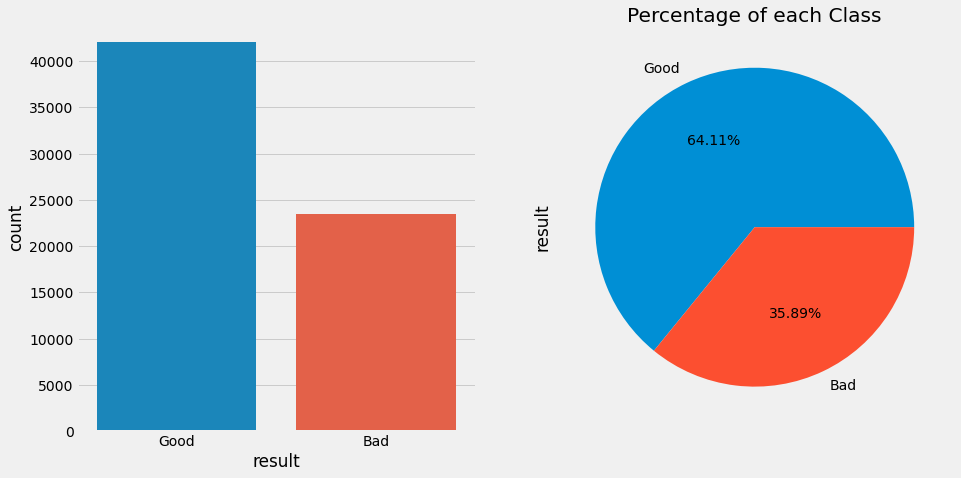

('sex', 0.03790750441157339)
('age_class', 0.11745818091024311)
('marry_status', 0.02299940826179001)
('education_level', 0.11463730221244195)
('live_person_num', 0.2834225761349734)
('live_class', 0.12381013900152009)
('work_year_class', 0.12516893670766704)
('income_class', 0.10316591743500911)
('business_stype', 0.062304422500257646)
('employment_stype', 0.009125612424524062)


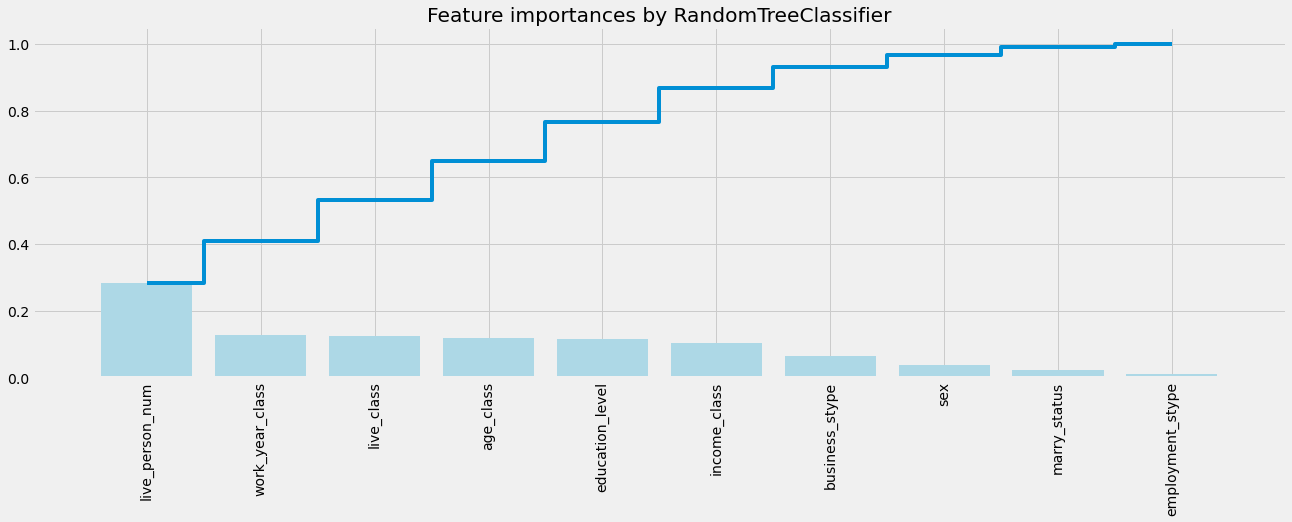

In [135]:
# 加载训练集数据
data_cr =read_csv('data/finalData/Terklasifikasi.csv', encoding = 'gbk')
data_cr.head() # 前五行记录
data_cr.shape # 数据大小

x_feature = list(data_cr.columns)
irrelevant = ['result', 'year']
for f in irrelevant:
    x_feature.remove(f)
    
# 构建自变量和因变量
X = data_cr[x_feature] # shape: (65535, 9)
y = data_cr["result"] # shape: (65535, 1)

n_sample = y.shape[0]
n_pos_sample = y[y == 'Good'].shape[0] # 统计Good标签量
n_neg_sample = y[y == 'Bad'].shape[0]# 统计Bad标签量
print('样本个数：{}; 正样本占{:.2%}; 负样本占{:.2%}'.format(n_sample,
                                                   n_pos_sample / n_sample,
                                                   n_neg_sample / n_sample))
print('特征维数：', X.shape[1])
print(data_cr.shape, X.shape, y.shape)

showData(data_cr, 'result')
imporFeature(data_cr)

### 划分训练集和测试集

In [ ]:
Y = [] # Good: 1, Bad: 0
for i in y:
    if i == 'Good':
        Y.append(1)
    elif i == 'Bad':
        Y.append(0)
X_train, X_test, y_train, y_test = tts(X, Y, train_size = 0.8) # 切割 训练集 占80% 和 测试集
print(X_train.shape, X_test.shape) 

### LogisticRegression训练以及相关评估

In [129]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

clf1 = LogisticRegression() # 构建逻辑回归分类器
clf1.fit(X_train, y_train)
y_pred = clf1.predict(X_test) # 通过分类器产生预测结果

print('================LogisticRegression 评估如下：')
print(classification_report(y_test, y_pred))  # 介绍可参考：https://www.cnblogs.com/178mz/p/8558435.html
print(round(accuracy_score(y_test, y_pred)))

(52428, 10) (13107, 10)
================LogisticRegression 评估如下：
              precision    recall  f1-score   support

           0       0.51      0.01      0.01      4729
           1       0.64      1.00      0.78      8378

    accuracy                           0.64     13107
   macro avg       0.57      0.50      0.40     13107
weighted avg       0.59      0.64      0.50     13107

1.0


### LinearRegression训练以及相关评估

In [120]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
y_pred = [round(i) for i in y_pred]

print('================LinearRegression 评估如下：')
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

================LinearRegression 评估如下：
              precision    recall  f1-score   support

           0       0.52      0.01      0.02      4729
           1       0.64      0.99      0.78      8378

    accuracy                           0.64     13107
   macro avg       0.58      0.50      0.40     13107
weighted avg       0.60      0.64      0.51     13107

0.639505607690547


### Perceptron训练以及相关评估

In [25]:
pc = Perceptron()
pc.fit(X_train, y_train)
y_pred = pc.predict(X_test)
y_pred = [round(i) for i in y_pred]

print('================Perceptron 评估如下：')
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

================Perceptron 评估如下：
              precision    recall  f1-score   support

           1       0.72      1.00      0.84       143
           2       1.00      0.02      0.03        57

    accuracy                           0.72       200
   macro avg       0.86      0.51      0.44       200
weighted avg       0.80      0.72      0.61       200

0.72


### 数据集2：australian.csv

### 读取、预处理、重写数据

In [75]:
# 加载训练集数据
data_cr =read_csv('data/finalData/australian.csv', encoding = 'gbk')
data_cr.head() # 前五行记录
print(data_cr.shape) # 数据大小

data = data_cr['title']
data = [d.split(' ') for d in data]  # 切割数据分布
X = [d[0:14] for d in data] 
y = [d[14] for d in data]
X = np.array(X) 
y = np.array(y)

# 保存csv
def ToSaveCsv(X, y, fath):
    res = pd.DataFrame()
    for i in range(14):
        x = [round(float(data)) for data in X[:, i]]
        res['A' + str(i)] = x
    res['Result'] = y
    res.to_csv(fath, index=False)

ToSaveCsv(X, y, 'data/finalData/australianNew.csv')
print('writing successful')

(690, 1)
writing successful


### 数据target分布情况

样本个数：690; 正样本占44.49%; 负样本占55.51%
特征维数： 14
(690, 15) (690, 14) (690,)


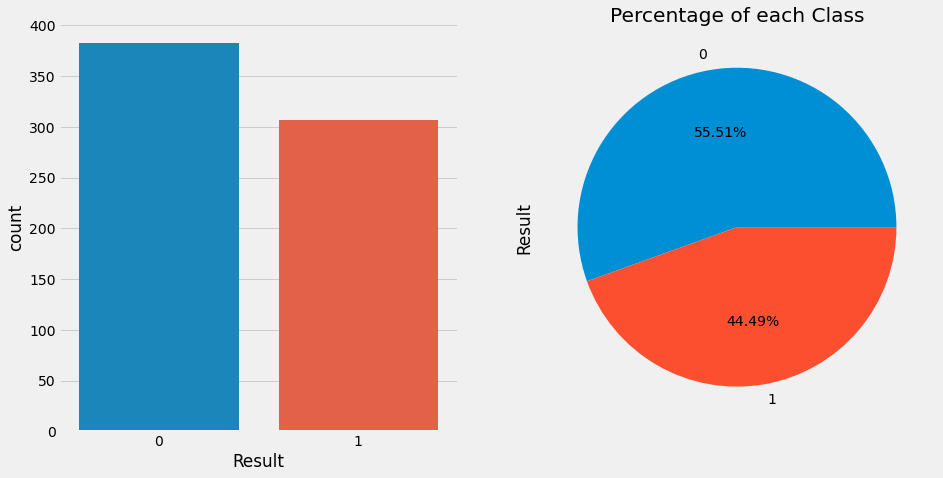

('A0', 0.011028660368725565)
('A1', 0.06338604269670431)
('A2', 0.05844348684049548)
('A3', 0.020909652895227872)
('A4', 0.0792051032017824)
('A5', 0.03468686676535102)
('A6', 0.042428174488034744)
('A7', 0.34517274171432993)
('A8', 0.03868726618554665)
('A9', 0.09062474199285525)
('A10', 0.010716354316439813)
('A11', 0.013798653926968807)
('A12', 0.08126734131680954)
('A13', 0.10964491329072865)


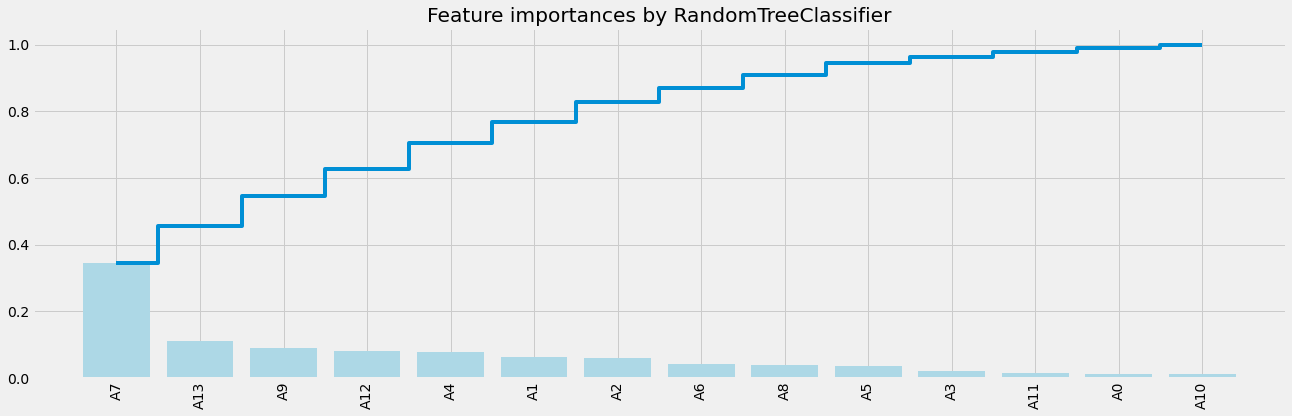

In [27]:
# 加载训练集数据
data_cr =read_csv('data/finalData/australianNew.csv', encoding = 'gbk')
data_cr.head() # 前五行记录

x_feature = list(data_cr.columns)
irrelevant = ['Result']
for f in irrelevant:
    x_feature.remove(f)
    
# 构建自变量和因变量
X = data_cr[x_feature] # shape: (65535, 9)
y = data_cr["Result"] # shape: (65535, 1)

n_sample = y.shape[0]
n_pos_sample = y[y == 1].shape[0] # 统计Good标签量

n_neg_sample = y[y == 0].shape[0]# 统计Bad标签量
print('样本个数：{}; 正样本占{:.2%}; 负样本占{:.2%}'.format(n_sample,
                                                   n_pos_sample / n_sample,
                                                   n_neg_sample / n_sample))
print('特征维数：', X.shape[1])
print(data_cr.shape, X.shape, y.shape)


showData(data_cr, 'Result')
imporFeature(data_cr)

### 划分训练集和测试集

In [28]:
# 切割训练集和测试集
X_train, X_test, y_train, y_test = tts(X, y, train_size = 0.8) # 切割 训练集 占80% 和 测试集
print(X_train.shape, X_test.shape) 

(552, 14) (138, 14)


### LogisticRegression 训练以及相关评估

In [93]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

clf1 = LogisticRegression() # 构建逻辑回归分类器
clf1.fit(X_train, y_train)
y_pred = clf1.predict(X_test) # 通过分类器产生预测结果

print('================LogisticRegression 评估如下：')
print(classification_report(y_test, y_pred))  # 介绍可参考：https://www.cnblogs.com/178mz/p/8558435.html
print(round(accuracy_score(y_test, y_pred)))

================LogisticRegression 评估如下：
              precision    recall  f1-score   support

           0       0.83      0.87      0.85        75
           1       0.83      0.79      0.81        63

    accuracy                           0.83       138
   macro avg       0.83      0.83      0.83       138
weighted avg       0.83      0.83      0.83       138

1.0


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### LinearRegression 训练以及相关评估

In [91]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
y_pred = [round(i) for i in y_pred]

print('================LinearRegression 评估如下：')
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

================LinearRegression 评估如下：
              precision    recall  f1-score   support

           0       0.89      0.83      0.86        75
           1       0.81      0.87      0.84        63

    accuracy                           0.85       138
   macro avg       0.85      0.85      0.85       138
weighted avg       0.85      0.85      0.85       138

0.8478260869565217


### Perceptron训练以及相关评估

In [29]:
pc = Perceptron()
pc.fit(X_train, y_train)
y_pred = pc.predict(X_test)
y_pred = [round(i) for i in y_pred]

print('================Perceptron 评估如下：')
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

================Perceptron 评估如下：
              precision    recall  f1-score   support

           0       0.68      0.62      0.65        76
           1       0.58      0.65      0.61        62

    accuracy                           0.63       138
   macro avg       0.63      0.63      0.63       138
weighted avg       0.64      0.63      0.63       138

0.6304347826086957


### 数据集3：german-numeric.csv

In [18]:
# 加载训练集数据
data_cr =read_csv('data/finalData/german-numeric.csv', encoding = 'gbk')
data_cr.head() # 前五行记录
print(data_cr.shape) # 数据大小

data = data_cr['title']
Data = []

for d in data:
    d = re.sub(' +', ' ', d)
    d = d.split()
    Data.append(d[0:len(d)]) # 归一化处理
    
X = [d[0:len(d)] for d in Data] 
y = [d[len(d) - 1] for d in Data]
X = np.array(X) 
y = np.array(y)

# 保存csv
def ToSaveCsv(X, y, fath):
    res = pd.DataFrame()
    for i in range(len(X[0]) - 1):
        x = [data for data in X[:, i]]
        res['A' + str(i)] = x
    res['Result'] = y
    res.to_csv(fath, index=False)

ToSaveCsv(X, y, 'data/finalData/german-numericNew.csv')
print('writing successful')

(1000, 1)
writing successful


### 数据target分布情况

样本个数：1000; 正样本占70.00%; 负样本占30.00%
特征维数： 24
(1000, 25) (1000, 24) (1000,)


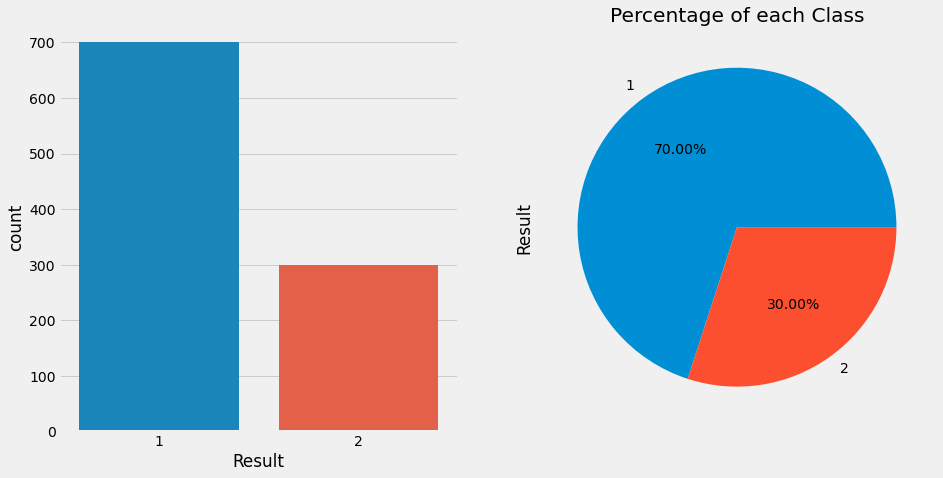

('A0', 0.10415998084797914)
('A1', 0.11556881453625985)
('A2', 0.07974032310728152)
('A3', 0.13244631375421442)
('A4', 0.0546401526183329)
('A5', 0.05217214465014712)
('A6', 0.04040627612617747)
('A7', 0.04646078432390732)
('A8', 0.04269570745326238)
('A9', 0.11556610185020613)
('A10', 0.02560348890409167)
('A11', 0.0234038947142538)
('A12', 0.01757570128372593)
('A13', 0.021903125133025385)
('A14', 0.003907605630440884)
('A15', 0.022302643897164555)
('A16', 0.01351097767177974)
('A17', 0.013483494436640122)
('A18', 0.007681025843564773)
('A19', 0.012936456829145038)
('A20', 0.013762375262985519)
('A21', 0.006697172547460677)
('A22', 0.011375085527338711)
('A23', 0.0220003530506149)


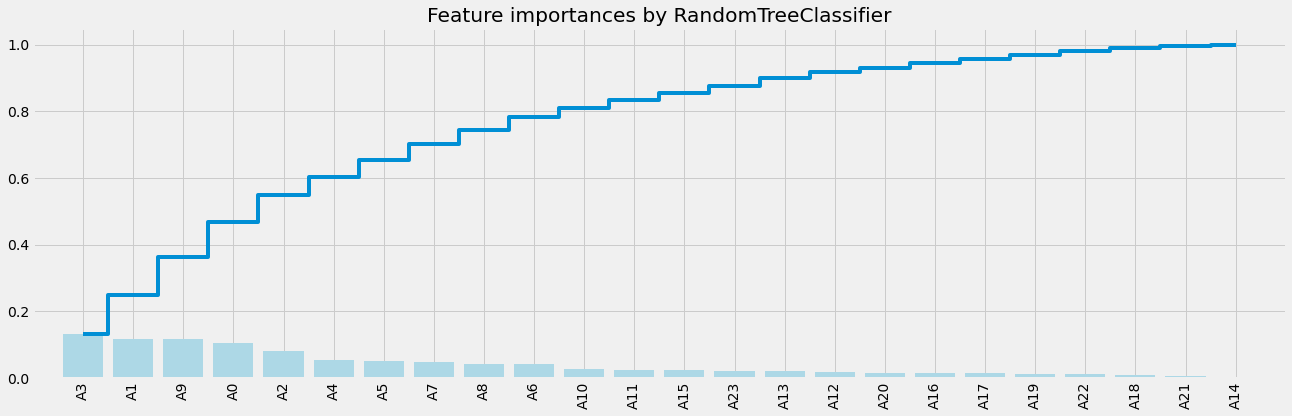

In [7]:
# 加载训练集数据
data_cr =read_csv('data/finalData/german-numericNew.csv', encoding = 'gbk')
data_cr.head() # 前五行记录

x_feature = list(data_cr.columns)
irrelevant = ['Result']
for f in irrelevant:
    x_feature.remove(f)
    
# 构建自变量和因变量
# X = data_cr[x_feature] # shape: (65535, 9)
X = data_cr[x_feature] # shape: (65535, 9)
y = data_cr["Result"] # shape: (65535, 1)

n_sample = y.shape[0]
n_pos_sample = y[y == 1].shape[0] # 统计Good标签量

n_neg_sample = y[y == 2].shape[0]# 统计Bad标签量
print('样本个数：{}; 正样本占{:.2%}; 负样本占{:.2%}'.format(n_sample,
                                                   n_pos_sample / n_sample,
                                                   n_neg_sample / n_sample))
print('特征维数：', X.shape[1])
print(data_cr.shape, X.shape, y.shape)


showData(data_cr, 'Result')
imporFeature(data_cr)

### 数据不平衡处理，重存csv文档

In [17]:
from imblearn.over_sampling import SMOTE # 导入SMOTE算法模块
# 处理不平衡数据
sm = SMOTE(random_state=42)    # 处理过采样的方法
X, y = sm.fit_resample(X, y)

X = np.array(X)
y = np.array(y) 

# 保存csv
def ToSaveCsv(X, y, fath):
    res = pd.DataFrame()
    for i in range(len(X[0]) - 1):
        x = [data for data in X[:, i]]
        res['A' + str(i)] = x
    res['Result'] = y
    res.to_csv(fath, index=False)

ToSaveCsv(X, y, 'data/finalData/german-numericNew2.csv')
print('writing successful')


通过SMOTE方法平衡正负样本后
样本个数：1400; 正样本占50.00%; 负样本占50.00%
writing successful
特征维数： 24
(1000, 25) (1400, 24) (1400,)


### 处理不平衡后的数据target分布情况

样本个数：1400; 正样本占50.00%; 负样本占50.00%
特征维数： 23
(1400, 24) (1400, 23) (1400,)


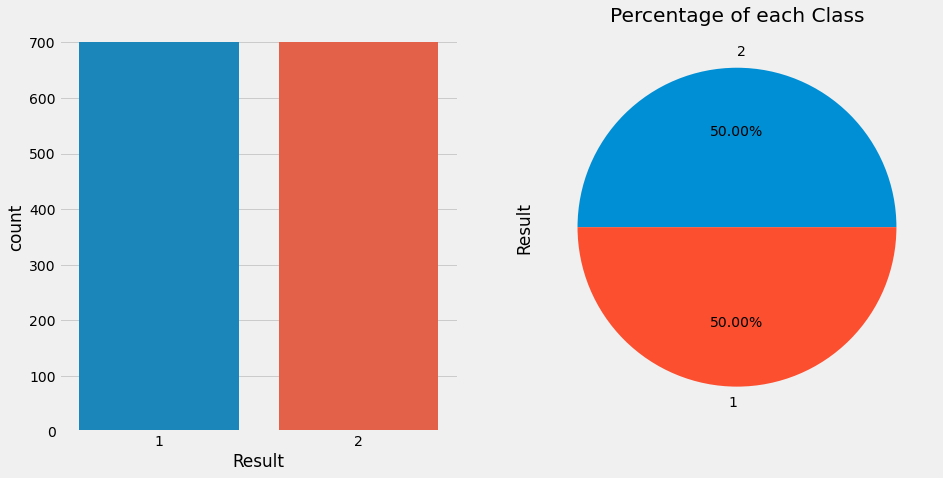

('A0', 0.15330900098236927)
('A1', 0.10248070770197248)
('A2', 0.0698385074900809)
('A3', 0.1126428824312065)
('A4', 0.05206151650656554)
('A5', 0.05563534227236855)
('A6', 0.04242836034908275)
('A7', 0.041154925357649905)
('A8', 0.04447434231880796)
('A9', 0.0939575360483783)
('A10', 0.041747364731571576)
('A11', 0.028575144394675327)
('A12', 0.013237177891129489)
('A13', 0.027642563943509245)
('A14', 0.005694654137215508)
('A15', 0.01615714506942741)
('A16', 0.015509579180409178)
('A17', 0.012541344303202617)
('A18', 0.004365700830007333)
('A19', 0.019010744829957477)
('A20', 0.026240739586402023)
('A21', 0.0018839726400874317)
('A22', 0.019410747003923208)


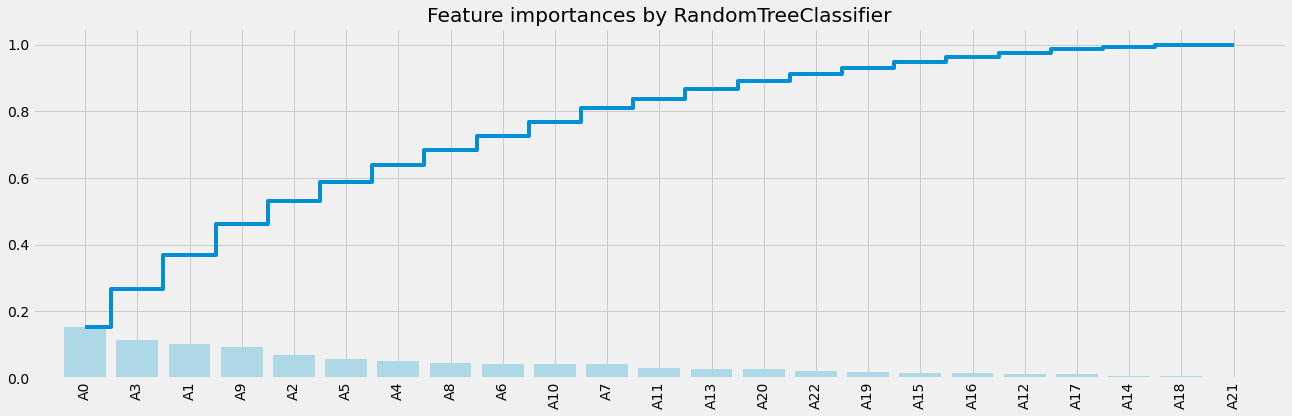

In [24]:
# 加载训练集数据
data_cr =read_csv('data/finalData/german-numericNew2.csv', encoding = 'gbk')
data_cr.head() # 前五行记录

x_feature = list(data_cr.columns)
irrelevant = ['Result']
for f in irrelevant:
    x_feature.remove(f)
    
# 构建自变量和因变量
# X = data_cr[x_feature] # shape: (65535, 9)
X = data_cr[x_feature] # shape: (65535, 9)
y = data_cr["Result"] # shape: (65535, 1)

n_sample = y.shape[0]
n_pos_sample = y[y == 1].shape[0] # 统计Good标签量

n_neg_sample = y[y == 2].shape[0]# 统计Bad标签量
print('样本个数：{}; 正样本占{:.2%}; 负样本占{:.2%}'.format(n_sample,
                                                   n_pos_sample / n_sample,
                                                   n_neg_sample / n_sample))
print('特征维数：', X.shape[1])
print(data_cr.shape, X.shape, y.shape)


showData(data_cr, 'Result')
imporFeature(data_cr)

### 划分训练集和测试集

In [46]:
# 切割训练集和测试集
X_train, X_test, y_train, y_test = tts(X, y, train_size = 0.8) # 切割 训练集 占80% 和 测试集
print(X_train.shape, X_test.shape) 

(1120, 23) (280, 23)


### LogisticRegression 训练以及相关评估

In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

clf1 = LogisticRegression() # 构建逻辑回归分类器
clf1.fit(X_train, y_train)
y_pred = clf1.predict(X_test) # 通过分类器产生预测结果

print('================LogisticRegression 评估如下：')
print(classification_report(y_test, y_pred))  # 介绍可参考：https://www.cnblogs.com/178mz/p/8558435.html
print(round(accuracy_score(y_test, y_pred)))

================LogisticRegression 评估如下：
              precision    recall  f1-score   support

           1       0.82      0.78      0.80       146
           2       0.77      0.81      0.79       134

    accuracy                           0.80       280
   macro avg       0.80      0.80      0.80       280
weighted avg       0.80      0.80      0.80       280

1.0


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### LinearRegression 训练以及相关评估

In [22]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
y_pred = [round(i) for i in y_pred]

print('================LinearRegression 评估如下：')
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

================LinearRegression 评估如下：
              precision    recall  f1-score   support

           1       0.80      0.92      0.86       143
           2       0.69      0.44      0.54        57

    accuracy                           0.79       200
   macro avg       0.75      0.68      0.70       200
weighted avg       0.77      0.79      0.77       200

0.785


### Perceptron训练以及相关评估

In [32]:
pc = Perceptron()
pc.fit(X_train, y_train)
y_pred = pc.predict(X_test)
y_pred = [round(i) for i in y_pred]

print('================Perceptron 评估如下：')
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

================Perceptron 评估如下：
              precision    recall  f1-score   support

           1       0.78      0.88      0.83       146
           2       0.50      0.33      0.40        54

    accuracy                           0.73       200
   macro avg       0.64      0.61      0.61       200
weighted avg       0.70      0.73      0.71       200

0.73
